## Script to analyze AligNet-Human-Validation Experiment

In [ ]:
# Setting up the environment
import pandas as pd
import numpy as np
import os
from scipy.stats import ttest_rel, pearsonr, spearmanr # to perform the stats analysis
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # plotting
import matplotlib.patches as patches # plotting
import seaborn as sns # plotting

# Load both CSV files that contains the behavioral results
results_df = pd.read_csv("Path//to/AligNet_Human_Validation_results.csv")

# Show the first few rows of each to inspect the structure
results_df_head = results_df.head()

(results_df_head)

# Load .csv file that holds the similarity ratings by alignet and unalignet
divergence_df = pd.read_csv("Path/to/max_divergence_top_100_of_1.csv", sep=';')

# Create the classification column
divergence_df['closer_to_alignet'] = divergence_df['align_unalign_z_diff_signed'] < 0

# Preview
divergence_df[['Image1', 'Image2', 'align_unalign_z_diff_signed', 'closer_to_alignet']].head()


,Image1,Image2,align_unalign_z_diff_signed,closer_to_alignet
0,n07565083_11373.JPEG,n07565083_8884.JPEG,2.969013,False
1,n07714990_486.JPEG,n07714990_2222.JPEG,2.776705,False
2,n03871628_5736.JPEG,n03871628_16234.JPEG,2.621526,False
3,n02971356_9654.JPEG,n02971356_2341.JPEG,2.602696,False
4,n03929660_7007.JPEG,n03929660_10538.JPEG,2.571162,False


In [5]:
# Filter only the experimental trials
experiment_df = results_df[results_df["exp_trial_type"] == "exp_trial"]

# Display the first few rows to check
experiment_df.head()

,rt,url,trial_type,trial_index,time_elapsed,internal_node_id,start,subject_id,study_id,OS,...,image1Path,image2Path,exp_trial_type,exp_trial_number,keypress,response_time,selected_similarity_rating,break_ending,fullscreen_exit_detected,interaction_data
19,14401.0,NaN,html-slider-response,19,819309,0.0-1.0-3.0-1.0,2025-05-12 12:28:39.572,participant_,6821d3ed79ef9bc797e4e473,Linux x86_64,...,stimuli/images_revision/n07753592_11578.JPEG,stimuli/images_revision/n07753592_15601.JPEG,exp_trial,70.0,NaN,14401.0,4.0,NaN,NaN,NaN
21,8889.0,NaN,html-slider-response,21,829205,0.0-1.0-3.0-1.1,2025-05-12 12:28:39.572,participant_,6821d3ed79ef9bc797e4e473,Linux x86_64,...,stimuli/images_revision/n02786058_10847.JPEG,stimuli/images_revision/n02786058_1833.JPEG,exp_trial,33.0,NaN,8889.0,4.0,NaN,NaN,NaN
23,4737.0,NaN,html-slider-response,23,834947,0.0-1.0-3.0-1.2,2025-05-12 12:28:39.572,participant_,6821d3ed79ef9bc797e4e473,Linux x86_64,...,stimuli/images_revision/n03595614_14516.JPEG,stimuli/images_revision/n03595614_12795.JPEG,exp_trial,31.0,NaN,4737.0,4.0,NaN,NaN,NaN
25,6099.0,NaN,html-slider-response,25,842053,0.0-1.0-3.0-1.3,2025-05-12 12:28:39.572,participant_,6821d3ed79ef9bc797e4e473,Linux x86_64,...,stimuli/images_revision/n03924679_7447.JPEG,stimuli/images_revision/n03924679_8982.JPEG,exp_trial,87.0,NaN,6099.0,4.0,NaN,NaN,NaN
27,10561.0,NaN,html-slider-response,27,853620,0.0-1.0-3.0-1.4,2025-05-12 12:28:39.572,participant_,6821d3ed79ef9bc797e4e473,Linux x86_64,...,stimuli/images_revision/n04131690_8613.JPEG,stimuli/images_revision/n04131690_13765.JPEG,exp_trial,28.0,NaN,10561.0,4.0,NaN,NaN,NaN


In [ ]:
# Clean image paths in the experiment DataFrame and merge both loaded files

experiment_df['image1_clean'] = experiment_df['image1Path'].str.extract(r'([^/]+\.JPEG)$')
experiment_df['image2_clean'] = experiment_df['image2Path'].str.extract(r'([^/]+\.JPEG)$')

divergence_df.columns = divergence_df.columns.str.strip()  # just in case there are leading/trailing spaces

merged_df = pd.merge(
    experiment_df,
    divergence_df[['Image1', 'Image2', 'closer_to_alignet', 'align_unalign_z_diff_signed']],
    left_on=['image1_clean', 'image2_clean'],
    right_on=['Image1', 'Image2'],
    how='inner'
)

selected_df = merged_df[[
    'image1_clean', 
    'image2_clean', 
    'response', 
    'closer_to_alignet', 
    'align_unalign_z_diff_signed',
    'prolific_id'
]]
selected_df



/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/2844788130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['image1_clean'] = experiment_df['image1Path'].str.extract(r'([^/]+\.JPEG)$')
/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/2844788130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['image2_clean'] = experiment_df['image2Path'].str.extract(r'([^/]+\.JPEG)$')


,image1_clean,image2_clean,response,closer_to_alignet,align_unalign_z_diff_signed,prolific_id
0,n07753592_11578.JPEG,n07753592_15601.JPEG,4,False,1.962749,subject_1
1,n02786058_10847.JPEG,n02786058_1833.JPEG,4,False,2.108004,subject_1
2,n03595614_14516.JPEG,n03595614_12795.JPEG,4,False,2.113545,subject_1
3,n03924679_7447.JPEG,n03924679_8982.JPEG,4,False,1.902470,subject_1
4,n04131690_8613.JPEG,n04131690_13765.JPEG,4,False,2.123174,subject_1
...,...,...,...,...,...,...
10795,n04552348_10423.JPEG,n04552348_4820.JPEG,5,True,-2.349742,subject_54
10796,n02799071_2055.JPEG,n02799071_39180.JPEG,4,True,-2.300377,subject_54
10797,n02356798_2508.JPEG,n02356798_4561.JPEG,5,True,-2.293022,subject_54
10798,n01632458_7518.JPEG,n01632458_2761.JPEG,5,True,-2.353622,subject_54


In [ ]:
# Ensure 'response' is numeric
selected_df['response'] = pd.to_numeric(selected_df['response'], errors='coerce')

# Detect slider range per participant
response_range_df = (
    selected_df
    .groupby('prolific_id', dropna=False)['response']
    .agg(['min', 'max'])
    .reset_index()
)

# We only want to use the 1-5 slider responses for anaylsis, as the 1-10 files are pilot trials
def classify_slider(row):
    if row['max'] <= 5:
        return '1–5'
    elif row['max'] <= 10:
        return '1–10'
    else:
        return 'unknown'

response_range_df['slider_type'] = response_range_df.apply(classify_slider, axis=1)

# Merge back into main dataframe
selected_df = selected_df.merge(response_range_df[['prolific_id', 'slider_type']], on='prolific_id', how='left')

# Compute mean rating per participant (including NaN IDs) for each alignment condition
participant_means = (
    selected_df
    .groupby(['prolific_id', 'closer_to_alignet', 'slider_type'], dropna=False)['response']
    .mean()
    .reset_index()
)

# Now compute the overall average across participants for each condition and slider type
group_means = (
    participant_means
    .groupby(['closer_to_alignet', 'slider_type'])['response']
    .mean()
    .reset_index()
)

# Show participant-level means
participant_means


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/1132944586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['response'] = pd.to_numeric(selected_df['response'], errors='coerce')


,prolific_id,closer_to_alignet,slider_type,response
0,subject_1,False,1–5,3.333333
1,subject_1,True,1–5,3.888889
2,subject_10,False,1–10,5.990000
3,subject_10,True,1–10,6.880000
4,subject_11,False,1–5,2.323232
...,...,...,...,...
103,subject_7,True,1–10,4.810000
104,subject_8,False,1–10,5.255102
105,subject_8,True,1–10,7.180000
106,subject_9,False,1–10,5.767677


In [ ]:
# Count number of participants per slider type (1-10 scale was only piloting)
participant_counts = response_range_df['slider_type'].value_counts(dropna=False)
print(participant_counts)


slider_type
1–5     49
1–10     5
Name: count, dtype: int64


In [10]:
# Compute overall mean of participant-level means
mean_by_group = (
    participant_means[participant_means['slider_type'] == '1–5']
    .groupby('closer_to_alignet')['response']
    .mean()
)

# Extract values
mean_true = mean_by_group[True]
mean_false = mean_by_group[False]

# Print result
print(f"Image pairs chosen based on the aligned representations yielded a mean rating of {mean_true:.2f}, "
      f"higher than the {mean_false:.2f} mean for pairs chosen based on the unaligned representations.")


Image pairs chosen based on the aligned representations yielded a mean rating of 3.93, higher than the 3.14 mean for pairs chosen based on the unaligned representations.


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/2402137224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['closer_to_alignet'] = df_5['closer_to_alignet'].astype(str)
/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/2402137224.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


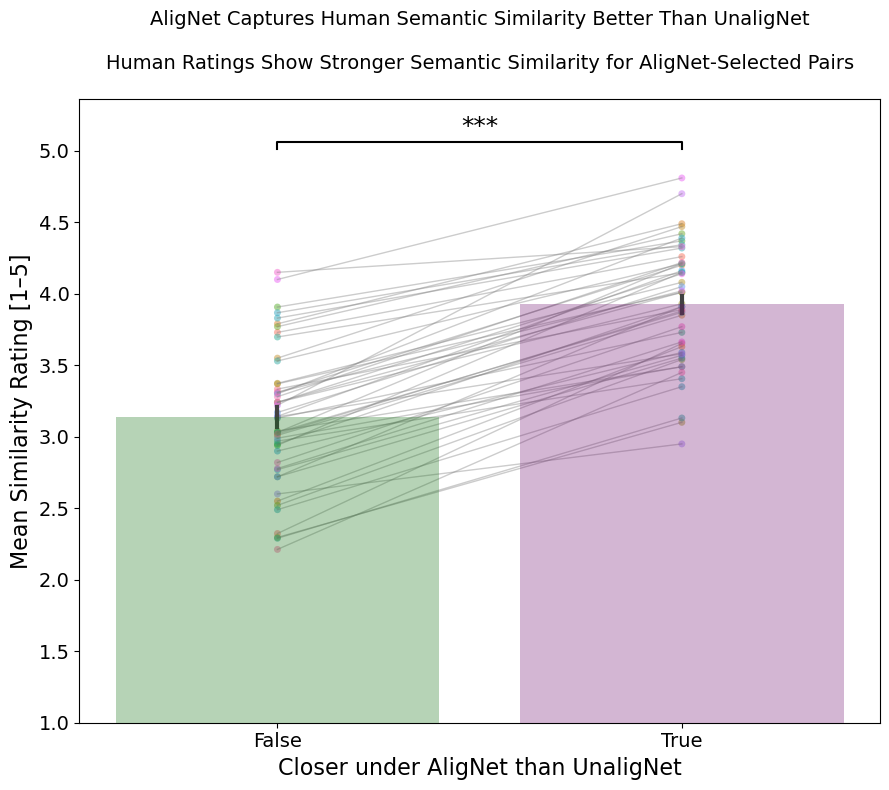

In [ ]:
# Filter for 1–5 slider (to have the experiment trials without piloting)
df_5 = participant_means[participant_means['slider_type'] == '1–5']

# Pivot for paired t-test
wide_df = df_5.pivot(index='prolific_id', columns='closer_to_alignet', values='response')
t_stat, p_val = ttest_rel(wide_df[True], wide_df[False])

# Convert boolean to string to match palette keys
df_5['closer_to_alignet'] = df_5['closer_to_alignet'].astype(str)

# Define the color mapping
bar_colors = {"False": "green", "True": "purple"}

# Create plot
plt.figure(figsize=(9, 8))

# Barplot with error bars
sns.barplot(
    data=df_5,
    x='closer_to_alignet',
    y='response',
    palette=bar_colors,
    alpha=0.3,
    errorbar='se',
    err_kws={'linewidth': 3},
    zorder=10
)

# Dot plot on top
sns.stripplot(
    data=df_5,
    x='closer_to_alignet',
    y='response',
    hue='prolific_id',
    palette='husl',
    jitter=False,
    dodge=False,
    alpha=0.5,
    zorder=1
)

# Connect dots for each participant
for pid, group in df_5.groupby('prolific_id'):
    if group['closer_to_alignet'].nunique() == 2:
        x_vals = [0, 1]
        y_vals = group.sort_values('closer_to_alignet')['response'].values
        plt.plot(x_vals, y_vals, color='gray', alpha=0.4, linewidth=1, zorder=1.5)

# Significance annotation with ***
y_max = df_5['response'].max()
x1, x2 = 0, 1
y, h, col = y_max + 0.2, 0.05, 'black'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h + 0.02, "***", ha='center', va='bottom', color=col, fontsize=18)

# Labels and title
plt.xlabel("Closer under AligNet than UnaligNet", fontsize=16)
plt.ylabel("Mean Similarity Rating [1–5]", fontsize=16)
plt.title(
    "AligNet Captures Human Semantic Similarity Better Than UnaligNet\n\n"
    "Human Ratings Show Stronger Semantic Similarity for AligNet-Selected Pairs\n",
    fontsize=14
)
plt.xticks(fontsize=14)
plt.yticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], fontsize=14)

plt.ylim(1, y + h + 0.3)
plt.gca().legend().remove()
plt.tight_layout()

# Save high-resolution
plt.savefig("alignet_rating_comparison_1-5_colored.png", dpi=300)
plt.show()


### Statistical Analysis


In [ ]:
## Perform the paired t-test

# Filter for 1–5 slider type
df_5 = participant_means[participant_means['slider_type'] == '1–5']

# Pivot to wide format
wide_df = df_5.pivot(index='prolific_id', columns='closer_to_alignet', values='response')

# Drop participants with missing values in either condition
wide_df = wide_df.dropna()

# Number of participants and degrees of freedom
n = wide_df.shape[0]
df_value = n - 1

# Run paired t-test
t_stat, p_val = ttest_rel(wide_df[True], wide_df[False])

# Format p-value
if p_val < 0.001:
    p_string = "p < 0.001"
else:
    p_string = f"p = {p_val:.3f}"

# Print results
print(f"Paired t-test results: t({df_value}) = {t_stat:.3f}, {p_string}")


Paired t-test results: t(48) = 20.260, p < 0.001


In [ ]:
## Correlatrion based analysis between unalignet and alignet image similarity scores and human ratings

# Ensure response is numeric
experiment_df['response'] = pd.to_numeric(experiment_df['response'], errors='coerce')

# Group and compute mean human similarity ratings per image pair
mean_human_ratings = (
    experiment_df
    .groupby(['image1_clean', 'image2_clean'], as_index=False)['response']
    .mean()
    .rename(columns={'response': 'mean_human_rating'})
)

# Merge model scores with mean human ratings
merged_df = pd.merge(
    mean_human_ratings,
    divergence_df[['Image1', 'Image2', 'alignet', 'unalignet']],
    left_on=['image1_clean', 'image2_clean'],
    right_on=['Image1', 'Image2'],
    how='inner'
)


/var/folders/y6/s5d79fxx4vn9jfrsc8vq3ns5rv4nmx/T/ipykernel_37965/2883801529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['response'] = pd.to_numeric(experiment_df['response'], errors='coerce')


In [21]:
# Correlation with AligNet
r_align, p_align = pearsonr(merged_df['alignet'], merged_df['mean_human_rating'])

# Correlation with UnaligNet
r_unalign, p_unalign = pearsonr(merged_df['unalignet'], merged_df['mean_human_rating'])

# Print results
print(f"AligNet:   r = {r_align:.3f}, p = {p_align:.3e}")
print(f"UnaligNet: r = {r_unalign:.3f}, p = {p_unalign:.3e}")

AligNet:   r = -0.640, p = 1.766e-24
UnaligNet: r = 0.068, p = 3.355e-01


In [22]:
from scipy.stats import spearmanr

# Spearman correlation with AligNet
r_align, p_align = spearmanr(merged_df['alignet'], merged_df['mean_human_rating'])

# Spearman correlation with UnaligNet
r_unalign, p_unalign = spearmanr(merged_df['unalignet'], merged_df['mean_human_rating'])

# Print results
print(f"AligNet:   ρ = {r_align:.3f}, p = {p_align:.3e}")
print(f"UnaligNet: ρ = {r_unalign:.3f}, p = {p_unalign:.3e}")

AligNet:   ρ = -0.641, p = 1.505e-24
UnaligNet: ρ = 0.122, p = 8.651e-02


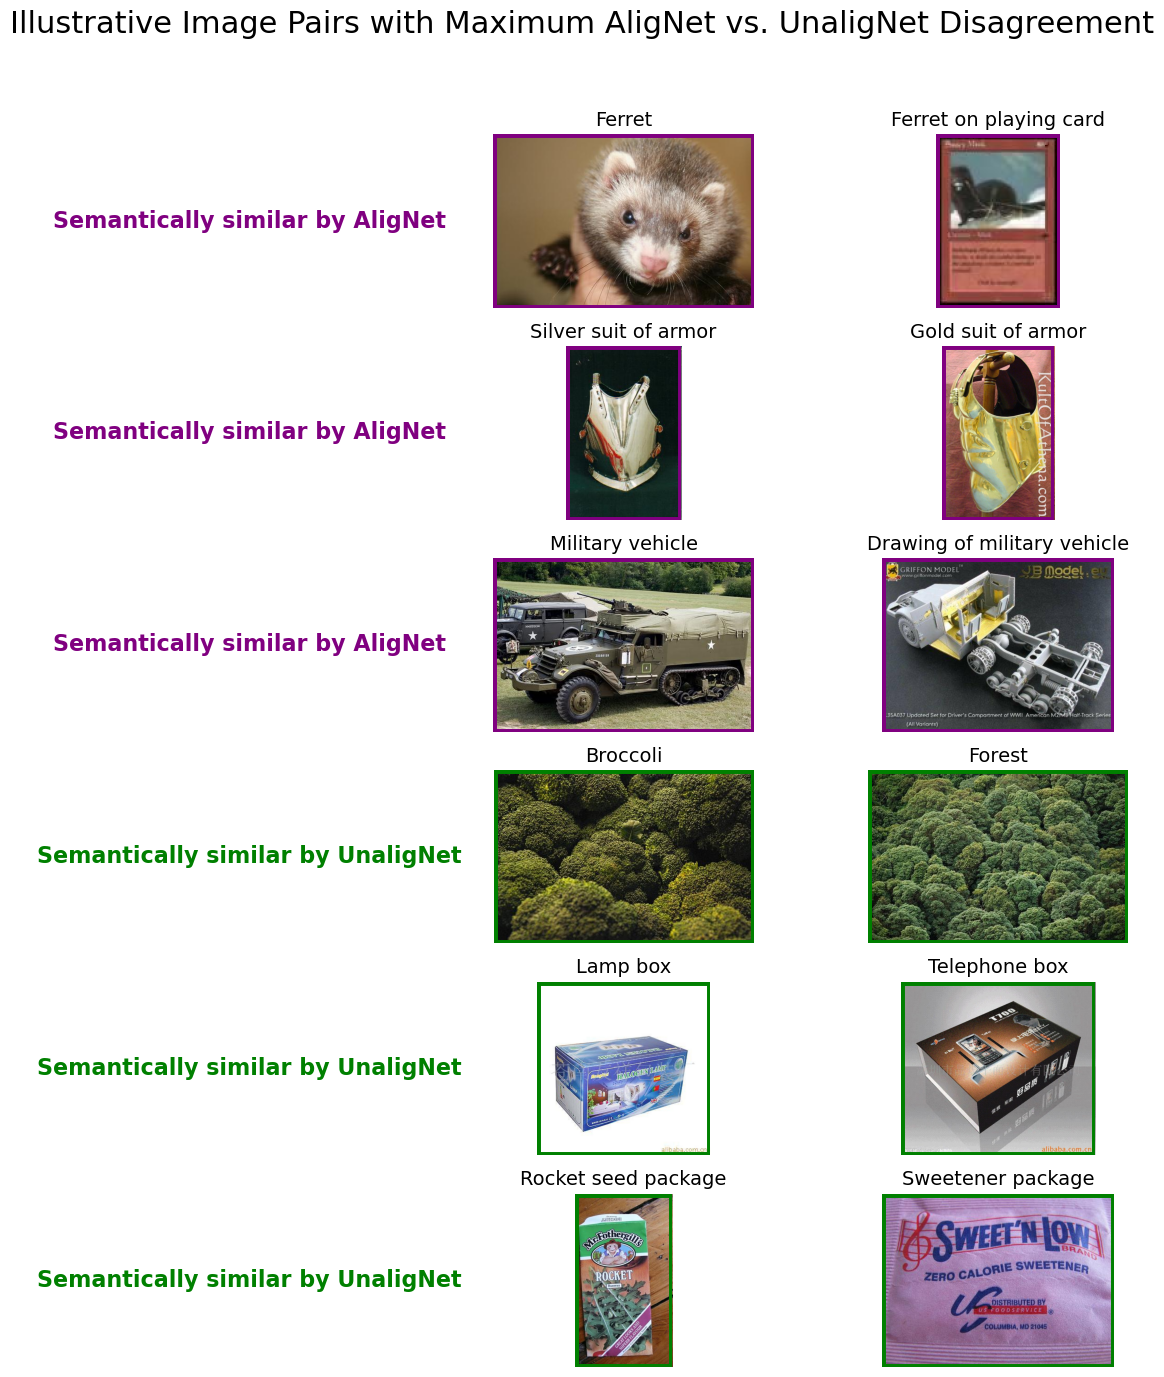

In [ ]:
# Define image directory
image_dir = "Path/to/stimuli/images_revision"


# Define image pairs
alignet_pairs = [
    ("n02442845_4826.JPEG", "n02442845_1297.JPEG"),
    ("n03146219_9451.JPEG", "n03146219_25934.JPEG"),
    ("n03478589_9857.JPEG", "n03478589_17203.JPEG"),
]

unalignet_pairs = [
    ("n07714990_486.JPEG", "n07714990_2222.JPEG"),
    ("n02971356_9654.JPEG", "n02971356_2341.JPEG"),
    ("n03871628_5736.JPEG", "n03871628_16234.JPEG"),
]

# Custom titles for each image
image1_titles = [
    "Ferret", 
    "Silver suit of armor", 
    "Military vehicle", 
    "Broccoli", 
    "Lamp box", 
    "Rocket seed package"
]

image2_titles = [
    "Ferret on playing card", 
    "Gold suit of armor", 
    "Drawing of military vehicle", 
    "Forest", 
    "Telephone box", 
    "Sweetener package"
]

# Combine data
all_pairs = alignet_pairs + unalignet_pairs
colors = (["purple"] * len(alignet_pairs)) + (["green"] * len(unalignet_pairs))
arrow_labels = (
    ["Semantically similar by AligNet"] * len(alignet_pairs) +
    ["Semantically similar by UnaligNet"] * len(unalignet_pairs)
)
arrow_colors = (["purple"] * len(alignet_pairs)) + (["green"] * len(unalignet_pairs))

# Create plot
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(12, 14))
fig.subplots_adjust(hspace=1.2, wspace=0.3)
fig.suptitle("Illustrative Image Pairs with Maximum AligNet vs. UnaligNet Disagreement", fontsize=22)

for i, ((img1, img2), label_text, color, arrow_color) in enumerate(zip(all_pairs, arrow_labels, colors, arrow_colors)):
    axs[i, 0].text(
        0.5, 0.5, 
        label_text,
        ha='center', va='center',
        fontsize=16,
        color=arrow_color,
        fontweight='bold',
        transform=axs[i, 0].transAxes
    )
    axs[i, 0].axis('off')

    for j, img in enumerate([img1, img2]):
        img_data = mpimg.imread(os.path.join(image_dir, img))
        axs[i, j + 1].imshow(img_data)
        axs[i, j + 1].axis('off')

        axs[i, j + 1].add_patch(
            patches.Rectangle(
                (0, 0), 1, 1,
                transform=axs[i, j + 1].transAxes,
                fill=False,
                edgecolor=color,
                linewidth=5
            )
        )

        title = image1_titles[i] if j == 0 else image2_titles[i]
        axs[i, j + 1].set_title(title, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("alignet_vs_unalignet_pairs_colored.png", dpi=300)
plt.show()

